
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

Each unit test that you pass is 1 point. 

There are 5 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernal

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section). 
____



### Import Data

In [1]:
import pandas as pd

# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
# YOUR CODE HERE

df = pd.read_json(data_url, lines=True)

print(df.shape)

df.head()

(10000, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [2]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

import spacy
nlp = spacy.load('en_core_web_sm')

In [4]:
import string
ENG_ALPHA_SET = set(string.ascii_letters)

STOP_WORDS = ['\n', ' ', '\n\n', ' \n\n', '  ','s','$','n','+']
REINSERT_WORDS = []#['not', 'nothing']
ALLOWED_POS = ['NOUN', 'ADJ', 'VERB', 'ADV']
def tokenize(doc):
# YOUR CODE HERE
    if (set(doc).intersection(ENG_ALPHA_SET)):
        return [ token.lemma_ for token in nlp(doc.lower(), disable=['parser', 'ner']) if (token.is_stop == False and token.is_punct == False and token.pos_ in ALLOWED_POS and token.text not in STOP_WORDS or token.text in REINSERT_WORDS )]
    
    return ['Not', 'an', 'english', 'language', 'review']    

In [5]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, use `NearestNeighbors` model for this. 

In [6]:
%%time
# Create a vector representation of the reviews 
# Name that doc-term matrix "dtm"


# YOUR CODE HERE
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#from pandarallel import pandarallel


#vect = TfidfVectorizer( ngram_range = (1,2), stop_words='english', min_df=3)
#dtm = vect.fit_transform(df.clean_text)

from sklearn.base import BaseEstimator, TransformerMixin

class TextCleaner(BaseEstimator, TransformerMixin):
    """
    Transformer to clean text using tokenize()
    """
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #pandarallel.initialize()
        return pd.Series(X).apply(lambda x: ' '.join(tokenize(x)))
    
cleaner = TextCleaner()
vect = TfidfVectorizer(tokenizer=lambda x: x.split(), ngram_range = (1,2), stop_words='english', min_df=3, max_df=0.5)

vectp = Pipeline(
    [
        ('cleaner', cleaner),
        ('vect',vect)
    ]
)

dtm = vectp.fit_transform(df.text)


CPU times: user 42.7 s, sys: 268 ms, total: 43 s
Wall time: 42.2 s


In [7]:
# Create and fit a NearestNeighbors model named "nn"
from sklearn.neighbors import NearestNeighbors

# YOUR CODE HERE

# Fit on DTM
nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm.todense())


NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [8]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [9]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
fake_review = "As far as shopping malls go the Great Mall in Milpitas is one of the best i've been to "

neighs = nn.kneighbors(vectp.transform([fake_review]).todense())[1][0]

for idx,neigh in enumerate(neighs):
    print(f'review[{idx}:{neigh}] = {df.iloc[neigh].stars}:{df.iloc[neigh].text} \n\n')

review[0:6343] = 1:This mall is not that great when this mall was under construction the developer advertised this mall being better than West Edmonton mall which is completely unture. Comparing the largest indoor water park and an amazing amusement park at West Edmonton mall the best you can do at Cross Iron Mills mall is eat at the food court or buy some fishing gear because this mall actually has a store which has a lots of fishing equipment. I have been to quite a few malls in different cities of Canada and the United States but nothing special at this mall. 


review[1:8044] = 1:Je n'ai pas aimé l'auto service. L'ambiance est plutôt froide, malgré au chaleureux accueil. 


review[2:3469] = 3:Schön und nett anzusehen, etwas überlaufen von Touristen, aber ganz okay. Aber leider kein Vergleich zu den Fountains of Dubai an der Dubai Mall. 


review[3:5995] = 4:I like this mall. Parking is always available and free. I never have to fight for a parking spot in the big garage.  This mall

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that Pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [10]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Name the gridsearch instance "gs"

# YOUR CODE HERE
from sklearn.svm import LinearSVC

vect = TfidfVectorizer(ngram_range = (1,2), stop_words='english', min_df=3)

#clf = KNeighborsClassifier()
clf = LinearSVC()
# Define the Pipeline
pipe = Pipeline([
    ('vect', vect),      # TF-IDF Vectorizer
    ('clf', clf)         # 
])

parameters = {
    'vect__max_df': (0.5, 0.7),
#   'clf__n_neighbors': (20, 25)
    'clf__C': ( 0.5, 0.7)
}

gs = GridSearchCV(pipe, parameters, n_jobs=1, verbose=1)
gs.fit(df.text, df.stars)

print(gs.predict([fake_review])[0])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   35.3s finished


5
CPU times: user 36.8 s, sys: 416 ms, total: 37.2 s
Wall time: 37.2 s


In [11]:
df.stars.value_counts()

# baseline accuracy is 0.4462
# The best 'max_df' value is 0.5 for both KNeighborsClassifier and LinearSVC
# KNeighborsClassifier goes from 0.5136 to 0.52.. to 0.53.. as n_neighbors increases from 10 to 25 
# LinearSVC gets 0.6159 with a best 'C' value of 0.5

5    4462
4    2185
1    1496
3    1098
2     759
Name: stars, dtype: int64

In [12]:
# Visible Testing
prediction = gs.predict(["I wish dogs knew how to speak English."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

In [13]:
print(prediction)
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

5
{'clf__C': 0.5, 'vect__max_df': 0.5}
0.6159000000000001
Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.5, max_features=None,
                                 min_df=3, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=0.5, class_weight=None, dual=True,
                     

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

In [14]:
from gensim import corpora
# Due to limited computationalresources on CodeGrader, use the non-multicore version of LDA 
from gensim.models.ldamodel import LdaModel
import gensim
import re

### 1. Estimate a LDA topic model of the review tex

In [15]:
%%time
# Remember to read the LDA docs for more information on the various class attirbutes and methods available to you
# in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

# don't change this value 
num_topics = 5

# use tokenize function you created earlier to create tokens 
df['tokens'] = df.text.apply(tokenize)

# create a id2word object (hint: use corpora.Dictionary)

id2word = corpora.Dictionary(df.tokens)

#id2word.filter_extremes(no_below=3, no_above=0.5)

# create a corpus object (hint: id2word.doc2bow)
corpus = [id2word.doc2bow(text) for text in df.tokens]
# How many words are in our vocab?
print(len(id2word.keys()))
# instantiate an lda model
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

# YOUR CODE HERE


17334
CPU times: user 42.2 s, sys: 66.1 ms, total: 42.3 s
Wall time: 42.3 s


#### Testing

In [16]:
# Visible Testing
assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

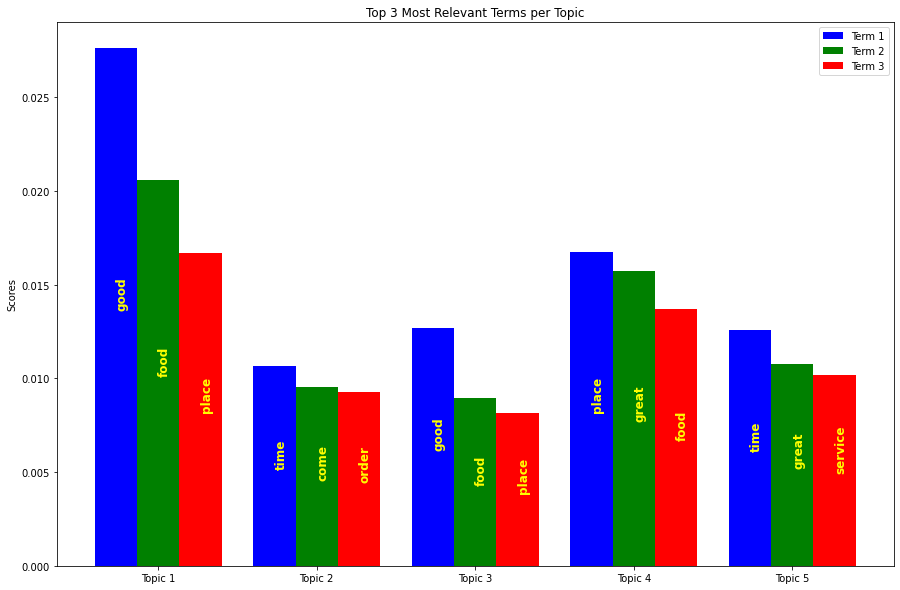

In [17]:
#Get the list of the 3 most important words and their probabilities per topic for all 5 topics
topic_words = lda.show_topics(num_words=3, formatted=False)

import numpy as np
import matplotlib.pyplot as plt

labels = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5']
x_ticks = np.arange(len(labels))  # the label locations

# Get the list of probabilities per topic for the 3 most important words
x_multi = [np.array([topic[1][wrd][1] for topic in topic_words])  for wrd in range(0,3)]

# Get the list of words per topic for the 3 most important words
w_multi = [np.array([topic[1][wrd][0] for topic in topic_words])  for wrd in range(0,3)]

fig, ax = plt.subplots(figsize=(15,10))

color_list = ['blue', 'green', 'red']
gap = .8 / len(x_multi)

x_ticks = list(map(lambda x:x+gap, x_ticks))

rects = []
for i, row in enumerate(x_multi):
  X = np.arange(len(row))
  rects.append( 
    plt.bar(X + i * gap, row,
        width = gap,
        color = color_list[i % len(color_list)])
  )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Top 3 Most Relevant Terms per Topic')
ax.set_xticks(x_ticks)
ax.set_xticklabels(labels)
ax.legend(['Term 1','Term 2','Term 3'])

def autolabel(rects, words):
    for idx,rect in enumerate(rects):
        word=words[idx]
        ax.text(rect.get_x() + rect.get_width() / 2,
                rect.get_height()/2,
                f'{word}',
                rotation=90, color='yellow',
                fontsize='large', fontweight='bold'
                )

for word in range(0,3):
    autolabel(rects[word],w_multi[word])

plt.show()

#### 2. Create 1-2 visualizations of the results

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use pyLDAvis (or a ploting tool of your choice) to visualize your results 

# YOUR CODE HERE
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
# sort_topics=False => Retain gensim's topic ordering so that the
# output of lda.show_topics() can be matched with the pyLDAvis
# diagram.
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word, sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.108242 -0.026728       1        1  34.075640
1      0.064761  0.016044       2        1  21.947126
2     -0.070654  0.059080       3        1  12.046026
3      0.000896 -0.050937       4        1  16.088597
4      0.113238  0.002541       5        1  15.842611, topic_info=         Term         Freq        Total Category  logprob  loglift
121      food  4972.000000  4972.000000  Default  30.0000  30.0000
177     great  4237.000000  4237.000000  Default  29.0000  29.0000
1002  chicken  1269.000000  1269.000000  Default  28.0000  28.0000
35       good  6470.000000  6470.000000  Default  27.0000  27.0000
590     taste  1207.000000  1207.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
263      want   333.917846  1789.608294   Topic5  -5.3326   0.1636
32       come   406.708693  3924.951161   Topic5  -5.1354  -0.4245
112     place   380.790559  5304.537192   Topic5  -5.2013  -0.7916
130     price   309.100525  1781.587254   Topic5  -5.4099   0.0909
343      take   281.545671  1451.661314   Topic5  -5.5032   0.2023

[465 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2602      2  0.972519      a.m.
3571      1  0.941450    accent
7555      4  0.963582   acrylic
1599      4  0.875539  adorable
1599      5  0.058369  adorable
...     ...       ...       ...
100       3  0.064098      year
100       4  0.110899      year
100       5  0.318454      year
6015      1  0.083360      yoga
6015      2  0.889170      yoga

[1219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

#### 3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)